# THIS PROJECT HAS BEEN INSPIRED BY WASP(WINNING AND SCORE PREDICTOR) WHICH IS USED TO PREDICT THE SCORES AND POSSIBLE RESULTS OF LIMITED OVERS MATCH.

Tasks:                                                
   
    1.Loading the data.
    2.Preparing the data.
    3.Selecting the best model
    4.Apply Train and test split
    5.Hyper-parameter tuning.
    6.Predicting and accuracy measure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_seq_items = 2000

In [2]:
data = pd.read_csv('odi.csv')
data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
5,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.6,6,0,0,0,301
6,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.1,6,0,0,0,301
7,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.2,6,0,0,0,301
8,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.3,6,0,0,0,301
9,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,7,0,1.3,7,0,0,0,301


In [3]:
data.shape

(350899, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
mid               350899 non-null int64
date              350899 non-null object
venue             350899 non-null object
bat_team          350899 non-null object
bowl_team         350899 non-null object
batsman           350899 non-null object
bowler            350899 non-null object
runs              350899 non-null int64
wickets           350899 non-null int64
overs             350899 non-null float64
runs_last_5       350899 non-null int64
wickets_last_5    350899 non-null int64
striker           350899 non-null int64
non-striker       350899 non-null int64
total             350899 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [5]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


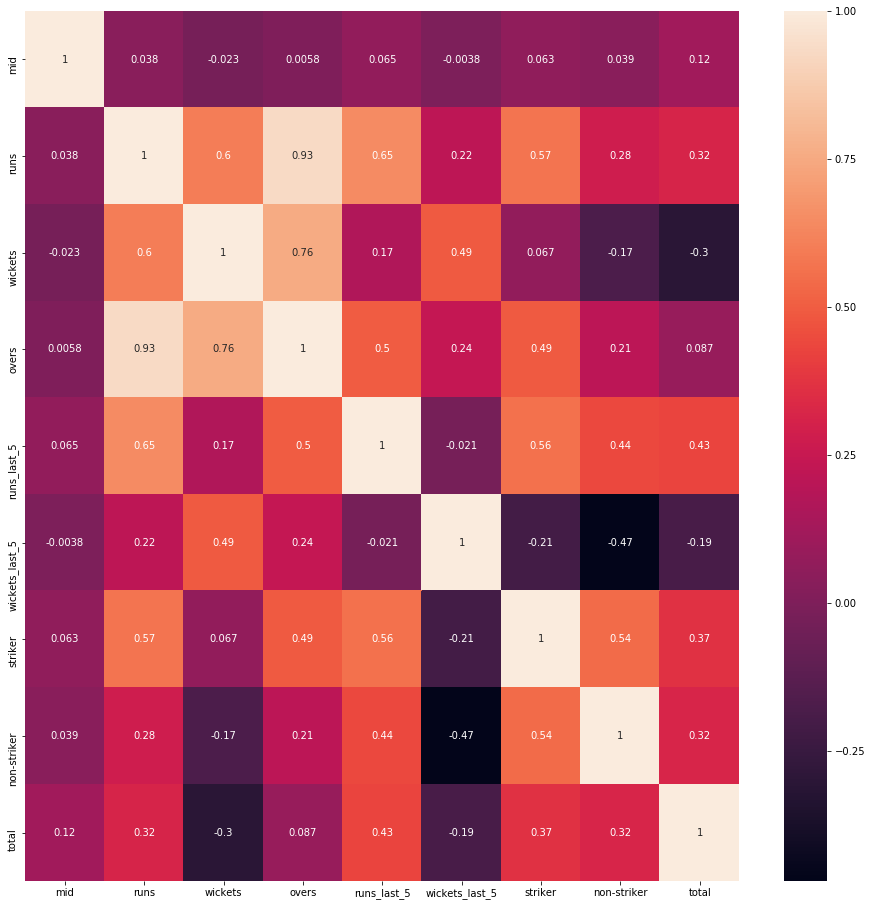

In [7]:
plt.figure(figsize=(16,16))
sns.heatmap(data[list(data.dtypes[data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [8]:
#As we can conclude from the heatmap above, Features: [runs,wickets,overs,striker,non-striker] are suitable for prediction beacuse the other features are not having much effect in the result.
X=data.iloc[:,[7,8,9,12,13]].values # Features: [runs,wickets,overs,striker,non-striker]
y = data.iloc[:, 14].values #Label->total

SPLITTING DATA INTO TRAINING AND TESTING SET

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
data.columns.tolist()

['mid',
 'date',
 'venue',
 'bat_team',
 'bowl_team',
 'batsman',
 'bowler',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'striker',
 'non-striker',
 'total']

FEATURE SCALING

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

<b>TRAINING THE DATASET</b>

<i>LINEAR REGRESSION</i>

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<i>RANDOM FOREST REGRESSION</i>

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_features=None)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

<b>TESTING THE DATASET</b>

Accuracy can be defined as the correct approximation to the result. So if we consider a threshold then we can consider it to be correct prediction.

In [14]:
def custom_accuracy(a,b,thresold):
    right = 0
    left = len(b)
    for i in range(0,left):
        if(abs(b[i]-a[i]) <= thresold):
            right += 1
            
    return ((right/left)*100)

In [15]:
y_lrapprox = lr.predict(X_test)
y_rfrapprox = rfr.predict(X_test)
scorelr = lr.score(X_test,y_test)*100
scorerfr = rfr.score(X_test,y_test)*100
print("R square value by lr:" , scorelr)
print("Custom accuracy by lr:" , custom_accuracy(y_test,y_lrapprox,20))
print("R square value by rfr:" , scorerfr)
print("Custom accuracy by rfr:" , custom_accuracy(y_test,y_rfrapprox,20))

R square value by lr: 52.737657811129445
Custom accuracy by lr: 43.354801937874036
R square value by rfr: 79.54011368611133
Custom accuracy by rfr: 77.03847249928755
